In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
plt.rcParams["figure.figsize"] = (10, 10)

In [2]:
df=pd.read_csv('game of thrones.csv')
df.head(10)

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers,Imdb rating,Summary
0,1,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,17-Apr-11,2.22,9.1,Eddard Stark is torn between his family and an...
1,2,2,1,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,24-Apr-11,2.20,8.8,"While Bran recovers from his fall, Ned takes o..."
2,3,3,1,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,01-May-11,2.44,8.7,Jon begins his training with the Night's Watch...
3,4,4,1,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,A Game of Thrones,08-May-11,2.45,8.8,Eddard investigates Jon Arryn's murder. Jon be...
4,5,5,1,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,15-May-11,2.58,9.1,Catelyn has captured Tyrion and plans to bring...
5,6,6,1,"""A Golden Crown""",Daniel Minahan,David Benioff & D. B. Weiss,A Game of Thrones,22-May-11,2.44,9.2,"While recovering from his battle with Jaime, E..."
6,7,7,1,"""You Win or You Die""",Daniel Minahan,David Benioff & D. B. Weiss,A Game of Thrones,NaN,2.42,9.2,Robert has been injured while hunting and is d...
7,8,8,1,"""The Pointy End""",Daniel Minahan,George R. R. Martin,A Game of Thrones,05-Jun-12,2.72,9.0,The Lannisters press their advantage over the ...
8,9,9,1,"""Baelor""",Alan Taylor,David Benioff & D. B. Weiss,A Game of Thrones,12-Jun-12,2.66,9.6,Robb goes to war against the Lannisters. Jon f...
9,10,10,1,"""Fire and Blood""",Alan Taylor,David Benioff & D. B. Weiss,A Game of Thrones,19-Jun-12,3.04,9.5,Robb vows to get revenge on the Lannisters. Jo...


In [3]:
df['No. in season'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [4]:
df['Season'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [5]:
df['Directed by'].unique()

array(['Tim Van Patten', 'Brian Kirk', 'Daniel Minahan', 'Alan Taylor',
       'Alik Sakharov', 'David Petrarca', 'David Nutter', 'Neil Marshall',
       'David Benioff', 'Alex Graves', 'Michelle MacLaren', 'D. B. Weiss',
       'Michael Slovis', 'Mark Mylod', 'Jeremy Podeswa',
       'Miguel Sapochnik', 'Daniel Sackheim', 'Jack Bender',
       'Matt Shakman', 'David Benioff & D. B. Weiss'], dtype=object)

In [6]:
df['Written by'].unique()

array(['David Benioff & D. B. Weiss', 'Bryan Cogman',
       'George R. R. Martin', 'Vanessa Taylor', 'Dave Hill'], dtype=object)

In [7]:
df.describe()

,No. overall,No. in season,Season,U.S. viewers,Imdb rating
count,73.000000,73.000000,73.000000,73.000000,73.000000
mean,37.000000,5.191781,4.205479,6.504932,8.832877
std,21.217131,2.821827,2.191897,2.831621,0.952927
min,1.000000,1.000000,1.000000,2.200000,4.000000
25%,19.000000,3.000000,2.000000,3.940000,8.700000
50%,37.000000,5.000000,4.000000,6.640000,8.900000
75%,55.000000,7.000000,6.000000,7.890000,9.400000
max,73.000000,10.000000,8.000000,13.610000,9.900000


In [8]:
import datetime

In [9]:
df['Original air date']=pd.to_datetime(df['Original air date'])

In [10]:
df

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers,Imdb rating,Summary
0,1,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,2011-04-17,2.22,9.1,Eddard Stark is torn between his family and an...
1,2,2,1,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,2011-04-24,2.20,8.8,"While Bran recovers from his fall, Ned takes o..."
2,3,3,1,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,2011-05-01,2.44,8.7,Jon begins his training with the Night's Watch...
3,4,4,1,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,A Game of Thrones,2011-05-08,2.45,8.8,Eddard investigates Jon Arryn's murder. Jon be...
4,5,5,1,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,2011-05-15,2.58,9.1,Catelyn has captured Tyrion and plans to bring...
...,...,...,...,...,...,...,...,...,...,...,...
68,69,2,8,"""A Knight of the Seven Kingdoms""",David Nutter,Bryan Cogman,Outline from A Dream of Spring and original co...,NaT,10.29,7.8,Jaime faces judgment and Winterfell prepares f...
69,70,3,8,"""The Long Night""",Miguel Sapochnik,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,2019-04-28,12.02,7.4,The Night King and his army have arrived at Wi...
70,71,4,8,"""The Last of the Starks""",David Nutter,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,2019-05-05,11.87,5.4,The Battle of Winterfell is over and a new cha...
71,72,5,8,"""The Bells""",Miguel Sapochnik,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,2019-05-12,12.48,5.9,Forces have arrived at King's Landing for the ...


In [11]:
df['Year']=df['Original air date'].dt.year

In [12]:
df['Month']=df['Original air date'].dt.year

In [13]:
df

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers,Imdb rating,Summary,Year,Month
0,1,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,2011-04-17,2.22,9.1,Eddard Stark is torn between his family and an...,2011.0,2011.0
1,2,2,1,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,2011-04-24,2.20,8.8,"While Bran recovers from his fall, Ned takes o...",2011.0,2011.0
2,3,3,1,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,2011-05-01,2.44,8.7,Jon begins his training with the Night's Watch...,2011.0,2011.0
3,4,4,1,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,A Game of Thrones,2011-05-08,2.45,8.8,Eddard investigates Jon Arryn's murder. Jon be...,2011.0,2011.0
4,5,5,1,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,2011-05-15,2.58,9.1,Catelyn has captured Tyrion and plans to bring...,2011.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,69,2,8,"""A Knight of the Seven Kingdoms""",David Nutter,Bryan Cogman,Outline from A Dream of Spring and original co...,NaT,10.29,7.8,Jaime faces judgment and Winterfell prepares f...,NaN,NaN
69,70,3,8,"""The Long Night""",Miguel Sapochnik,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,2019-04-28,12.02,7.4,The Night King and his army have arrived at Wi...,2019.0,2019.0
70,71,4,8,"""The Last of the Starks""",David Nutter,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,2019-05-05,11.87,5.4,The Battle of Winterfell is over and a new cha...,2019.0,2019.0
71,72,5,8,"""The Bells""",Miguel Sapochnik,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,2019-05-12,12.48,5.9,Forces have arrived at King's Landing for the ...,2019.0,2019.0


In [14]:
df.isnull().sum()

No. overall           0
No. in season         0
Season                0
Title                 0
Directed by           0
Written by            0
Novel(s) adapted      0
Original air date    12
U.S. viewers          0
Imdb rating           0
Summary               0
Year                 12
Month                12
dtype: int64

In [15]:
df.fillna(' ', inplace=True)
df.isna().sum()

No. overall          0
No. in season        0
Season               0
Title                0
Directed by          0
Written by           0
Novel(s) adapted     0
Original air date    0
U.S. viewers         0
Imdb rating          0
Summary              0
Year                 0
Month                0
dtype: int64

<AxesSubplot:>

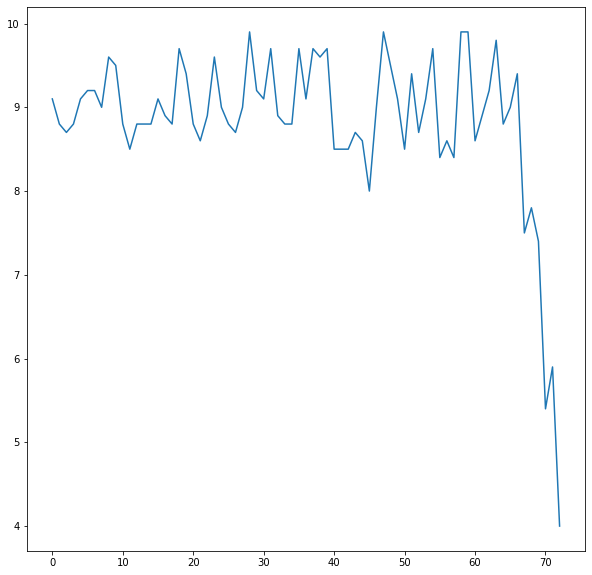

In [16]:
df['Imdb rating'].plot()

<AxesSubplot:>

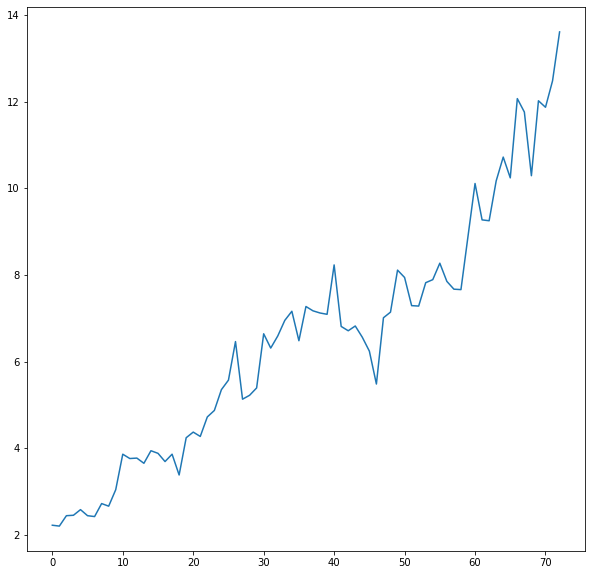

In [17]:
df['U.S. viewers'].plot()

# Correlation between features

<AxesSubplot:title={'center':'average rating by seasons'}, xlabel='Season'>

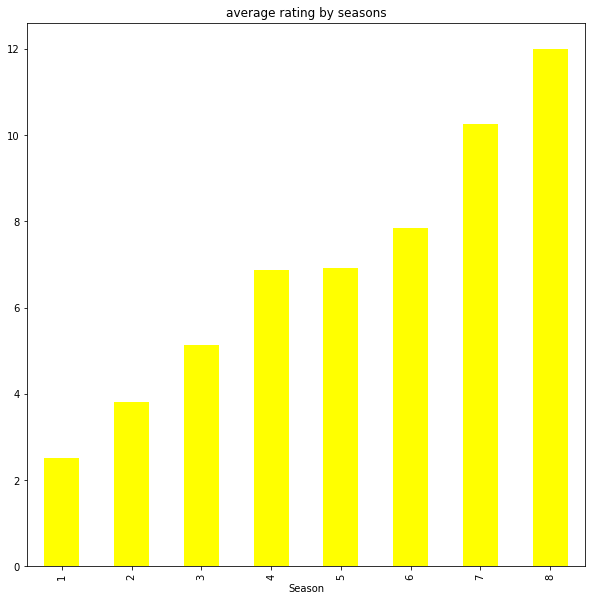

In [18]:
df.groupby('Season')['U.S. viewers'].mean().plot.bar(title='average rating by seasons',color='yellow')

<AxesSubplot:xlabel='Season', ylabel='U.S. viewers'>

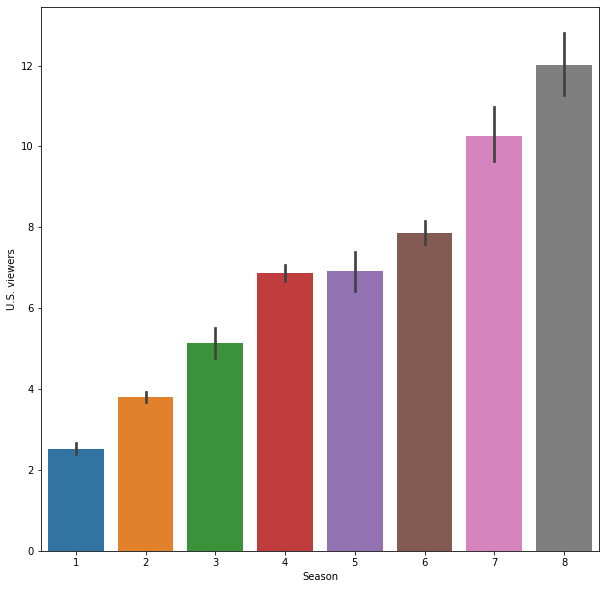

In [19]:
sns.barplot(x='Season',y='U.S. viewers',data=df)

<AxesSubplot:title={'center':'average rating by seasons'}, xlabel='Season'>

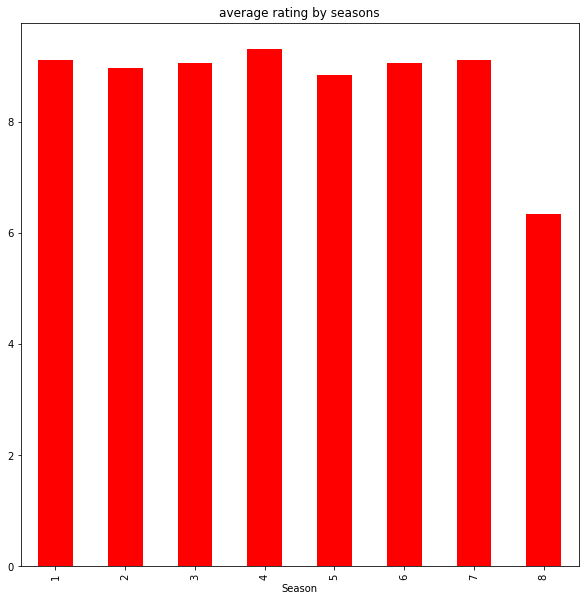

In [20]:
df.groupby('Season')['Imdb rating'].mean().plot.bar(title='average rating by seasons',color='red')

# IMBD rating' by seasons and directors

<AxesSubplot:xlabel='Season,Directed by'>

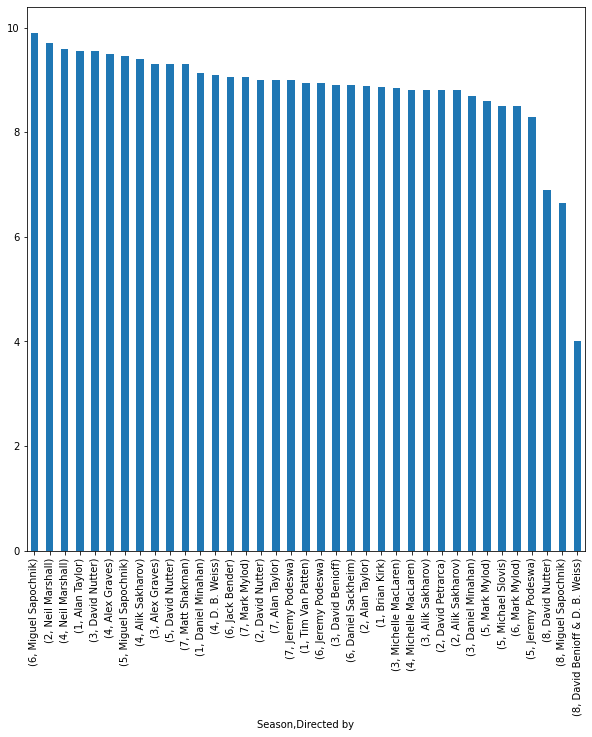

In [21]:
df.groupby(['Season','Directed by'])['Imdb rating'].mean().sort_values(ascending=False).plot.bar()

# viewership' by seasons and directors

<AxesSubplot:xlabel='Season,Directed by'>

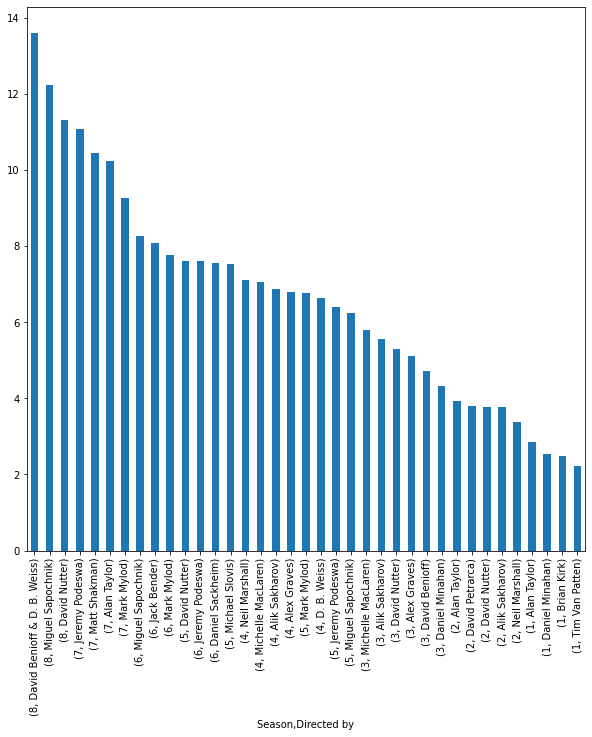

In [22]:
df.groupby(['Season','Directed by'])['U.S. viewers'].mean().sort_values(ascending=False).plot.bar()

# IMBD ratings' by seasons and writers

<AxesSubplot:xlabel='Season,Written by'>

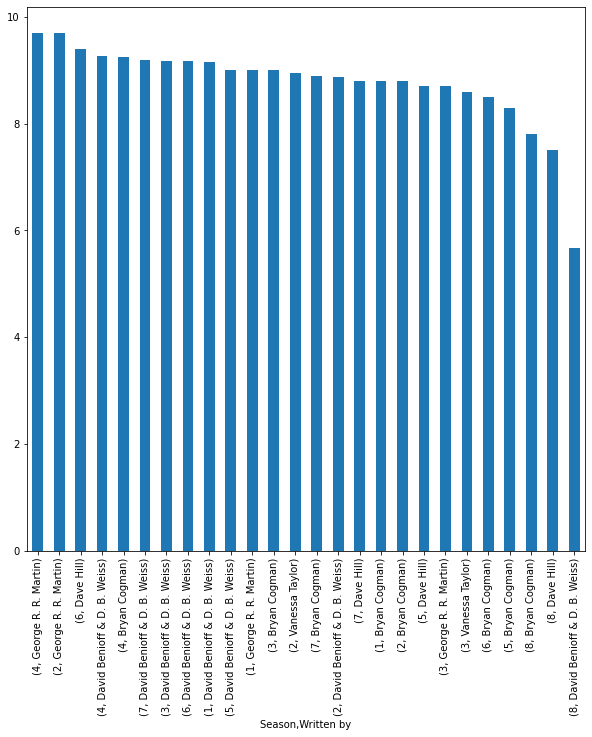

In [23]:
df.groupby(['Season','Written by'])['Imdb rating'].mean().sort_values(ascending=False).plot.bar()

# viewership' by seasons and writers

<AxesSubplot:xlabel='Season,Written by'>

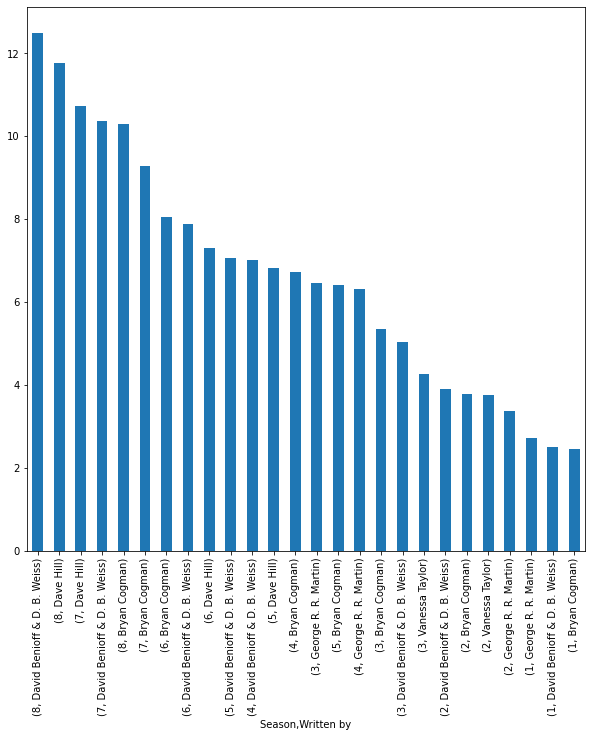

In [24]:
df.groupby(['Season','Written by'])['U.S. viewers'].mean().sort_values(ascending=False).plot.bar()

# season Title analysis

In [25]:
text1 = " ".join(title for title in df.Title)

In [26]:
word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 3840, height = 2160).generate(text1)

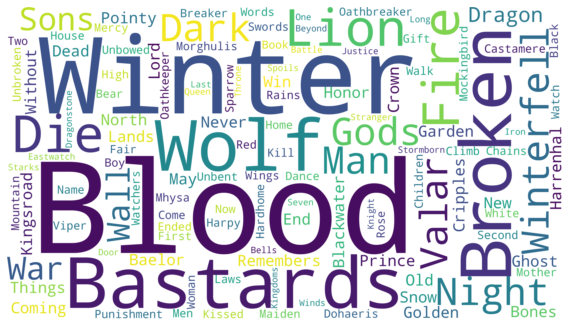

In [27]:
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator,STOPWORDS
import requests

In [29]:
got = Image.open(requests.get("https://www.pngmart.com/files/4/Game-of-Thrones-PNG-Free-Download.png", stream=True).raw)
got_mask = Image.new("RGB", got.size, (255,255,255))
got_mask.paste(got,got)
got_mask = np.array(got_mask)

(-0.5, 511.5, 511.5, -0.5)

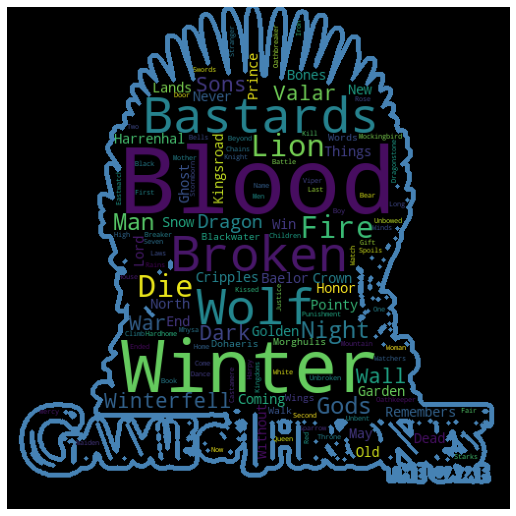

In [30]:

stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 881,
                      height = 1038,
                      max_words = 150,
                      stopwords = stopwords,
                      mask=got_mask,
                      background_color = "black",
                      contour_width=5,
                      contour_color='steelblue',
                      max_font_size = 200,
                      min_word_length= 2,
                      random_state=40
                     ).generate(text1)

fig = plt.figure(figsize=(9,10))
plt.imshow(wordcloud)
plt.axis('off')

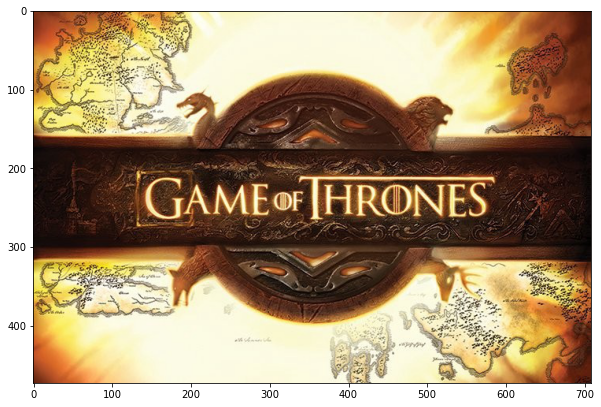

In [31]:
background_image = np.array(Image.open('game.jpeg'))
plt.imshow(background_image)

In [32]:
# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(background_color = 'white',mask = background_image, 
               width = 3840, height = 2160).generate(text1)
# font color matching the masked image
img_colors = ImageColorGenerator(background_image)
word_cloud2.recolor(color_func = img_colors)

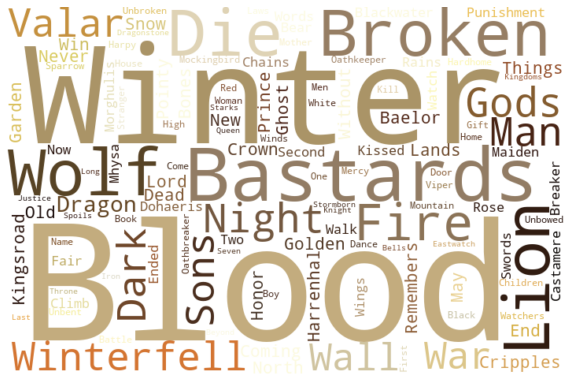

In [33]:
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import string
import squarify
import seaborn as sns

list_stopwords = set(stopwords.words('english'))

In [35]:
df1=df.loc[:,['Title','Summary']]
df1=df1.dropna()

In [36]:
df1

,Title,Summary
0,"""Winter Is Coming""",Eddard Stark is torn between his family and an...
1,"""The Kingsroad""","While Bran recovers from his fall, Ned takes o..."
2,"""Lord Snow""",Jon begins his training with the Night's Watch...
3,"""Cripples, Bastards, and Broken Things""",Eddard investigates Jon Arryn's murder. Jon be...
4,"""The Wolf and the Lion""",Catelyn has captured Tyrion and plans to bring...
...,...,...
68,"""A Knight of the Seven Kingdoms""",Jaime faces judgment and Winterfell prepares f...
69,"""The Long Night""",The Night King and his army have arrived at Wi...
70,"""The Last of the Starks""",The Battle of Winterfell is over and a new cha...
71,"""The Bells""",Forces have arrived at King's Landing for the ...


In [37]:
df1['Title'] = df1['Title'].str.lower()
df1['Title'] = df1['Title'].apply(word_tokenize)
df1['Title'] = df1['Title'].apply(lambda x: [word for word in x if word not in list_stopwords])
df1['Title'] = df1['Title'].apply(lambda x : [word.translate(str.maketrans('', '', string.punctuation)) for word in x])

df1['Summary'] = df1['Summary'].str.lower()
df1['Summary'] = df1['Summary'].apply(word_tokenize)
df1['Summary'] = df1['Summary'].apply(lambda x: [word for word in x if word not in list_stopwords])
df1['Summary'] = df1['Summary'].apply(lambda x : [word.translate(str.maketrans('', '', string.punctuation)) for word in x])

In [38]:
df1

,Title,Summary
0,"[, winter, coming, ]","[eddard, stark, torn, family, old, friend, ask..."
1,"[, kingsroad, ]","[bran, recovers, fall, , ned, takes, daughters..."
2,"[, lord, snow, ]","[jon, begins, training, night, s, watch, , ned..."
3,"[, cripples, , bastards, , broken, things, ]","[eddard, investigates, jon, arryn, s, murder, ..."
4,"[, wolf, lion, ]","[catelyn, captured, tyrion, plans, bring, sist..."
...,...,...
68,"[, knight, seven, kingdoms, ]","[jaime, faces, judgment, winterfell, prepares,..."
69,"[, long, night, ]","[night, king, army, arrived, winterfell, great..."
70,"[, last, starks, ]","[battle, winterfell, new, chapter, westeros, b..."
71,"[, bells, ]","[forces, arrived, king, s, landing, final, bat..."


In [39]:
df.loc[:,['Title','Summary']]=df1.loc[:,['Title','Summary']]

In [40]:
df

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers,Imdb rating,Summary,Year,Month
0,1,1,1,"[, winter, coming, ]",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,2011-04-17 00:00:00,2.22,9.1,"[eddard, stark, torn, family, old, friend, ask...",2011.0,2011.0
1,2,2,1,"[, kingsroad, ]",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,2011-04-24 00:00:00,2.20,8.8,"[bran, recovers, fall, , ned, takes, daughters...",2011.0,2011.0
2,3,3,1,"[, lord, snow, ]",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,2011-05-01 00:00:00,2.44,8.7,"[jon, begins, training, night, s, watch, , ned...",2011.0,2011.0
3,4,4,1,"[, cripples, , bastards, , broken, things, ]",Brian Kirk,Bryan Cogman,A Game of Thrones,2011-05-08 00:00:00,2.45,8.8,"[eddard, investigates, jon, arryn, s, murder, ...",2011.0,2011.0
4,5,5,1,"[, wolf, lion, ]",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,2011-05-15 00:00:00,2.58,9.1,"[catelyn, captured, tyrion, plans, bring, sist...",2011.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,69,2,8,"[, knight, seven, kingdoms, ]",David Nutter,Bryan Cogman,Outline from A Dream of Spring and original co...,,10.29,7.8,"[jaime, faces, judgment, winterfell, prepares,...",,
69,70,3,8,"[, long, night, ]",Miguel Sapochnik,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,2019-04-28 00:00:00,12.02,7.4,"[night, king, army, arrived, winterfell, great...",2019.0,2019.0
70,71,4,8,"[, last, starks, ]",David Nutter,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,2019-05-05 00:00:00,11.87,5.4,"[battle, winterfell, new, chapter, westeros, b...",2019.0,2019.0
71,72,5,8,"[, bells, ]",Miguel Sapochnik,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,2019-05-12 00:00:00,12.48,5.9,"[forces, arrived, king, s, landing, final, bat...",2019.0,2019.0


In [41]:
df_s1=df[df['Season']==1]
df_s2=df[df['Season']==2]
df_s3=df[df['Season']==3]
df_s4=df[df['Season']==4]
df_s5=df[df['Season']==5]
df_s6=df[df['Season']==6]
df_s7=df[df['Season']==7]
df_s8=df[df['Season']==8]

In [42]:
df_title_explo1=pd.DataFrame(df_s1['Title'].explode())
df_title_explo1=df_title_explo1[df_title_explo1['Title'] != '']
df_title_explo1=df_title_explo1[df_title_explo1['Title'] != 's']
df_title_explo1=pd.DataFrame(df_title_explo1.groupby('Title')['Title'].count().sort_values(ascending=False))

df_title_explo2=pd.DataFrame(df_s2['Title'].explode())
df_title_explo2=df_title_explo2[df_title_explo2['Title'] != '']
df_title_explo2=df_title_explo2[df_title_explo2['Title'] != 's']
df_title_explo2=pd.DataFrame(df_title_explo2.groupby('Title')['Title'].count().sort_values(ascending=False))

df_title_explo3=pd.DataFrame(df_s3['Title'].explode())
df_title_explo3=df_title_explo3[df_title_explo3['Title'] != '']
df_title_explo3=df_title_explo3[df_title_explo3['Title'] != 's']
df_title_explo3=pd.DataFrame(df_title_explo3.groupby('Title')['Title'].count().sort_values(ascending=False))

df_title_explo4=pd.DataFrame(df_s4['Title'].explode())
df_title_explo4=df_title_explo4[df_title_explo4['Title'] != '']
df_title_explo4=df_title_explo4[df_title_explo4['Title'] != 's']
df_title_explo4=pd.DataFrame(df_title_explo4.groupby('Title')['Title'].count().sort_values(ascending=False))

df_title_explo5=pd.DataFrame(df_s5['Title'].explode())
df_title_explo5=df_title_explo5[df_title_explo5['Title'] != '']
df_title_explo5=df_title_explo5[df_title_explo5['Title'] != 's']
df_title_explo5=pd.DataFrame(df_title_explo5.groupby('Title')['Title'].count().sort_values(ascending=False))

df_title_explo6=pd.DataFrame(df_s6['Title'].explode())
df_title_explo6=df_title_explo6[df_title_explo6['Title'] != '']
df_title_explo6=df_title_explo6[df_title_explo6['Title'] != 's']
df_title_explo6=pd.DataFrame(df_title_explo6.groupby('Title')['Title'].count().sort_values(ascending=False))

df_title_explo7=pd.DataFrame(df_s7['Title'].explode())
df_title_explo7=df_title_explo7[df_title_explo7['Title'] != '']
df_title_explo7=df_title_explo7[df_title_explo7['Title'] != 's']
df_title_explo7=pd.DataFrame(df_title_explo7.groupby('Title')['Title'].count().sort_values(ascending=False))

df_title_explo8=pd.DataFrame(df_s8['Title'].explode())
df_title_explo8=df_title_explo8[df_title_explo8['Title'] != '']
df_title_explo8=df_title_explo8[df_title_explo8['Title'] != 's']
df_title_explo8=pd.DataFrame(df_title_explo8.groupby('Title')['Title'].count().sort_values(ascending=False))


In [43]:
print(df_title_explo1.index)
print(df_title_explo2.index)
print(df_title_explo3.index)
print(df_title_explo4.index)
print(df_title_explo5.index)
print(df_title_explo6.index)
print(df_title_explo7.index)
print(df_title_explo8.index)

Index(['baelor', 'bastards', 'winter', 'win', 'things', 'snow', 'pointy',
       'lord', 'lion', 'kingsroad', 'golden', 'fire', 'end', 'die', 'crown',
       'cripples', 'coming', 'broken', 'blood', 'wolf'],
      dtype='object', name='Title')
Index(['blackwater', 'morghulis', 'winterfell', 'valar', 'remembers', 'prince',
       'old', 'north', 'night', 'new', 'never', 'may', 'bones', 'man', 'lands',
       'honor', 'harrenhal', 'gods', 'ghost', 'garden', 'die', 'dead',
       'without'],
      dtype='object', name='Title')
Index(['dark', 'bear', 'punishment', 'wings', 'watch', 'walk', 'valar', 'sons',
       'second', 'rains', 'mhysa', 'castamere', 'maiden', 'kissed', 'fire',
       'fair', 'ended', 'dohaeris', 'climb', 'words'],
      dtype='object', name='Title')
Index(['breaker', 'chains', 'wall', 'viper', 'two', 'swords', 'rose',
       'oathkeeper', 'name', 'mountain', 'mockingbird', 'men', 'lion', 'laws',
       'gods', 'first', 'children', 'watchers'],
      dtype='object', nam

In [44]:
word1="""'baelor', 'bastards', 'winter', 'win', 'things', 'snow', 'pointy',
       'lord', 'lion', 'kingsroad', 'golden', 'fire', 'end', 'die', 'crown',
       'cripples', 'coming', 'broken', 'blood', 'wolf'"""
word2="""'blackwater', 'morghulis', 'winterfell', 'valar', 'remembers', 'prince',
       'old', 'north', 'night', 'new', 'never', 'may', 'bones', 'man', 'lands',
       'honor', 'harrenhal', 'gods', 'ghost', 'garden', 'die', 'dead',
       'without'"""
word3="""'dark', 'bear', 'punishment', 'wings', 'watch', 'walk', 'valar', 'sons',
       'second', 'rains', 'mhysa', 'castamere', 'maiden', 'kissed', 'fire',
       'fair', 'ended', 'dohaeris', 'climb', 'words'"""
word4="""'breaker', 'chains', 'wall', 'viper', 'two', 'swords', 'rose',
       'oathkeeper', 'name', 'mountain', 'mockingbird', 'men', 'lion', 'laws',
       'gods', 'first', 'children', 'watchers'"""
word5="""'black', 'boy', 'wars', 'unbroken', 'unbowed', 'unbent', 'sparrow',
       'sons', 'mother', 'mercy', 'kill', 'house', 'high', 'harpy', 'hardhome',
       'gift', 'dragons', 'dance', 'come', 'white'"""
word6="""'blood', 'bastards', 'battle', 'book', 'broken', 'door', 'home', 'man',
       'oathbreaker', 'one', 'red', 'stranger', 'winds', 'winter', 'woman'"""
word7="""'beyond', 'dragon', 'dragonstone', 'eastwatch', 'justice', 'queen',
       'spoils', 'stormborn', 'wall', 'war', 'wolf'"""
word8="""'bells', 'iron', 'kingdoms', 'knight', 'last', 'long', 'night', 'seven',
       'starks', 'throne', 'winterfell'"""

# Season 1 Title analysis

(-0.5, 599.5, 499.5, -0.5)

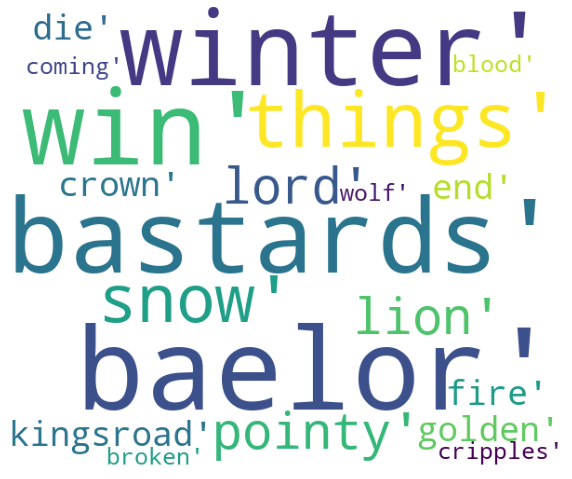

In [45]:
wc1 = WordCloud(background_color="white", width=600,height=500)
wc1.generate(word1)
plt.imshow(wc1)
plt.axis('off')

# Season 2 Title analysis

(-0.5, 599.5, 499.5, -0.5)

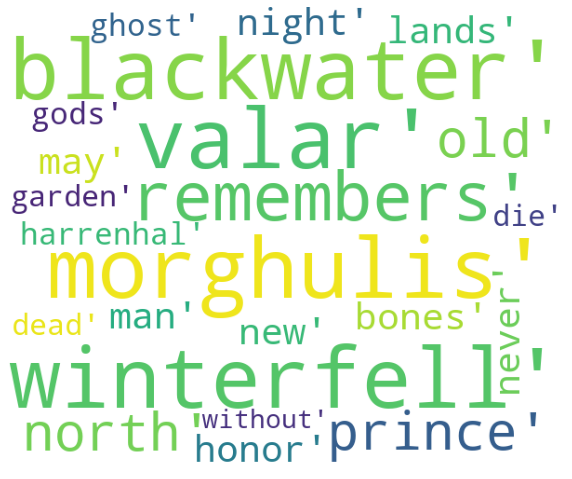

In [46]:
wc2 = WordCloud(background_color="white", width=600,height=500)
wc2.generate(word2)
plt.imshow(wc2)
plt.axis('off')

# Season 3 Title analysis

(-0.5, 599.5, 499.5, -0.5)

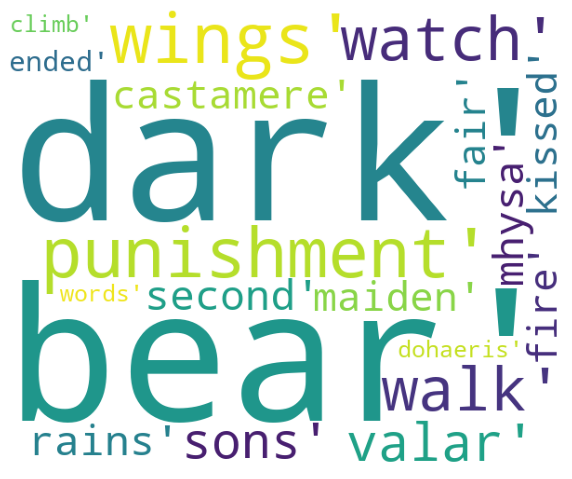

In [47]:
wc3 = WordCloud(background_color="white", width=600,height=500)
wc3.generate(word3)
plt.imshow(wc3)
plt.axis('off')

# Season 8 title analysis

(-0.5, 599.5, 499.5, -0.5)

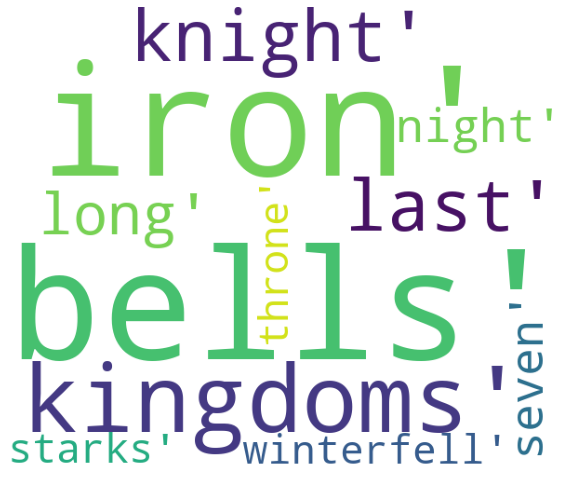

In [48]:
wc8 = WordCloud(background_color="white", width=600,height=500)
wc8.generate(word8)
plt.imshow(wc8)
plt.axis('off')

In [49]:
df_summary_explo1=pd.DataFrame(df_s1['Summary'].explode())
df_summary_explo1=df_summary_explo1[df_summary_explo1['Summary'] != '']
df_summary_explo1=df_summary_explo1[df_summary_explo1['Summary'] != 's']
df_summary_explo1=pd.DataFrame(df_summary_explo1.groupby('Summary')['Summary'].count().sort_values(ascending=False).head(30))
df_summary_explo1=df_summary_explo1.rename(columns={'Summary': 'num'})

df_summary_explo2=pd.DataFrame(df_s2['Summary'].explode())
df_summary_explo2=df_summary_explo2[df_summary_explo2['Summary'] != '']
df_summary_explo2=df_summary_explo2[df_summary_explo2['Summary'] != 's']
df_summary_explo2=pd.DataFrame(df_summary_explo2.groupby('Summary')['Summary'].count().sort_values(ascending=False).head(30))
df_summary_explo2=df_summary_explo2.rename(columns={'Summary': 'num'})

df_summary_explo3=pd.DataFrame(df_s3['Summary'].explode())
df_summary_explo3=df_summary_explo3[df_summary_explo3['Summary'] != '']
df_summary_explo3=df_summary_explo3[df_summary_explo3['Summary'] != 's']
df_summary_explo3=pd.DataFrame(df_summary_explo3.groupby('Summary')['Summary'].count().sort_values(ascending=False).head(30))
df_summary_explo3=df_summary_explo3.rename(columns={'Summary': 'num'})

df_summary_explo4=pd.DataFrame(df_s4['Summary'].explode())
df_summary_explo4=df_summary_explo4[df_summary_explo4['Summary'] != '']
df_summary_explo4=df_summary_explo4[df_summary_explo4['Summary'] != 's']
df_summary_explo4=pd.DataFrame(df_summary_explo4.groupby('Summary')['Summary'].count().sort_values(ascending=False).head(30))
df_summary_explo4=df_summary_explo4.rename(columns={'Summary': 'num'})

df_summary_explo5=pd.DataFrame(df_s5['Summary'].explode())
df_summary_explo5=df_summary_explo5[df_summary_explo5['Summary'] != '']
df_summary_explo5=df_summary_explo5[df_summary_explo5['Summary'] != 's']
df_summary_explo5=pd.DataFrame(df_summary_explo5.groupby('Summary')['Summary'].count().sort_values(ascending=False).head(30))
df_summary_explo5=df_summary_explo5.rename(columns={'Summary': 'num'})

df_summary_explo6=pd.DataFrame(df_s6['Summary'].explode())
df_summary_explo6=df_summary_explo6[df_summary_explo6['Summary'] != '']
df_summary_explo6=df_summary_explo6[df_summary_explo6['Summary'] != 's']
df_summary_explo6=pd.DataFrame(df_summary_explo6.groupby('Summary')['Summary'].count().sort_values(ascending=False).head(30))
df_summary_explo6=df_summary_explo6.rename(columns={'Summary': 'num'})

df_summary_explo7=pd.DataFrame(df_s7['Summary'].explode())
df_summary_explo7=df_summary_explo7[df_summary_explo7['Summary'] != '']
df_summary_explo7=df_summary_explo7[df_summary_explo7['Summary'] != 's']
df_summary_explo7=pd.DataFrame(df_summary_explo7.groupby('Summary')['Summary'].count().sort_values(ascending=False).head(30))
df_summary_explo7=df_summary_explo7.rename(columns={'Summary': 'num'})

df_summary_explo8=pd.DataFrame(df_s8['Summary'].explode())
df_summary_explo8=df_summary_explo8[df_summary_explo8['Summary'] != '']
df_summary_explo8=df_summary_explo8[df_summary_explo8['Summary'] != 's']
df_summary_explo8=pd.DataFrame(df_summary_explo8.groupby('Summary')['Summary'].count().sort_values(ascending=False).head(30))
df_summary_explo8=df_summary_explo8.rename(columns={'Summary': 'num'})

# Top 30 words in summary in season1

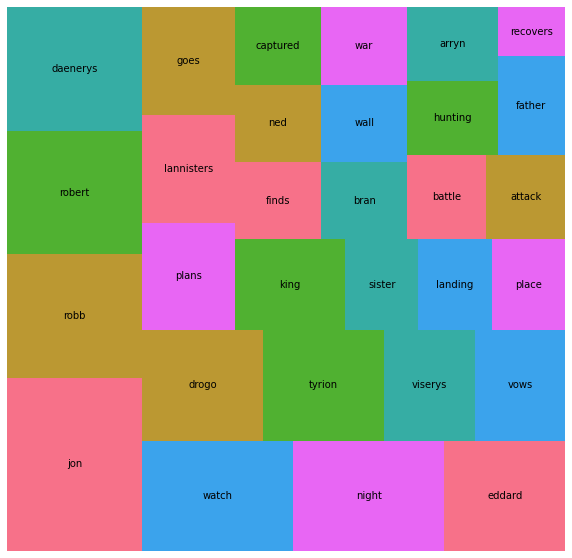

In [50]:
x = df_summary_explo1['num']
label = df_summary_explo1.index
squarify.plot(x, label=label,color=sns.color_palette('husl'))
plt.rcParams["figure.figsize"] = (10, 10)
plt.axis('off')
plt.show()

# Top 30 words in summary in season2

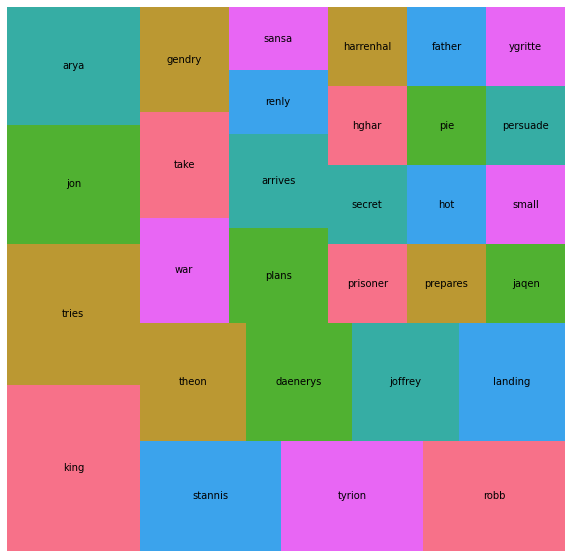

In [51]:
x = df_summary_explo2['num']
label = df_summary_explo2.index
squarify.plot(x, label=label,color=sns.color_palette('husl'))
plt.axis('off')
plt.show()

# Top 30 words in summary in season3

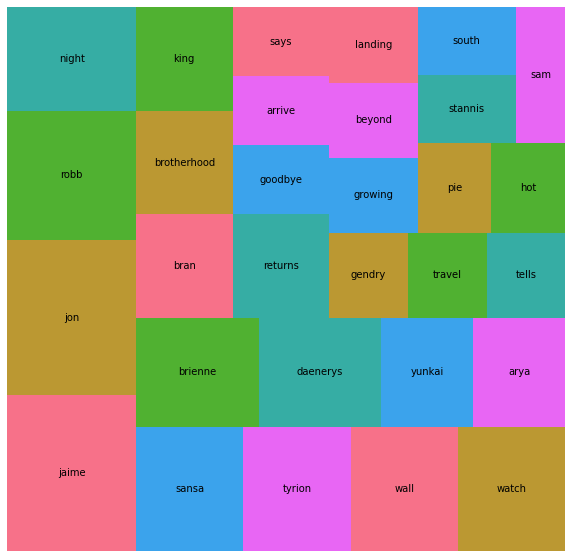

In [52]:
x = df_summary_explo3['num']
label = df_summary_explo3.index
squarify.plot(x, label=label,color=sns.color_palette('husl'))
plt.axis('off')
plt.show()

# Top 30 words in summary in season8

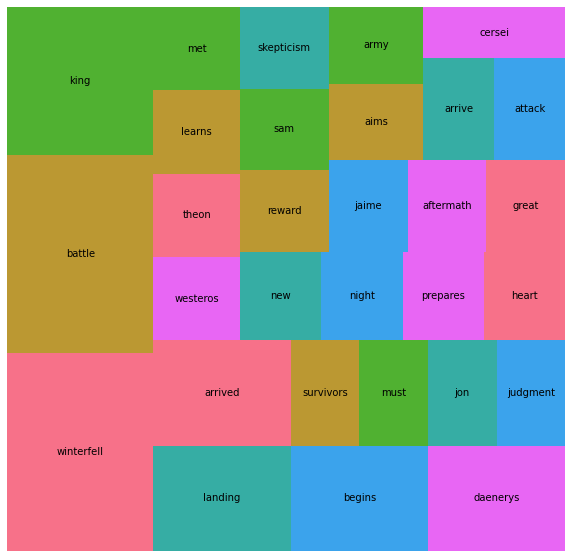

In [53]:
x = df_summary_explo8['num']
label = df_summary_explo8.index
squarify.plot(x, label=label,color=sns.color_palette('husl'))
plt.axis('off')
plt.show()